<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-and-Metric" data-toc-modified-id="Exploratory-Data-Analysis-and-Metric-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis and Metric</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Submit" data-toc-modified-id="Submit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Submit</a></span></li><li><span><a href="#Homework" data-toc-modified-id="Homework-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Homework</a></span></li></ul></div>

# **[Kaggle InClass: Language Detection](https://www.kaggle.com/c/introml2020-3)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score


import re
from collections import Counter
from tqdm import tqdm_notebook
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pymorphy2
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myazev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\myazev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
SEED = 42

# Exploratory Data Analysis and Metric

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.shape, test_df.shape

((3159633, 2), (2784634, 2))

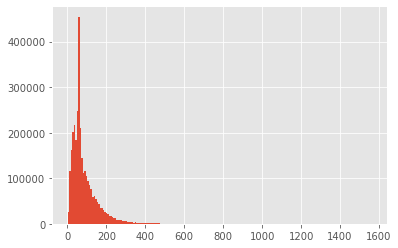

In [5]:
train_df.sentence.str.len().hist(bins=200);

In [6]:
train_df = train_df = train_df[(train_df.sentence.str.len() != 0)]

In [7]:
train_df.head(60)

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
5,"Na primjer , pjesnik ga opisuje ovako .",hr
6,Semua rerumputan itu sekarang menutupi tanah s...,id
7,Det är en enorm utmaning för oss att göra det .,sv
8,Ono što ćete vidjeti - trebat ćete skočiti ovd...,hr
9,( Alqışlar ) Excel-dən istifadə etmişəm .,az


In [8]:
def preprocessor(text):
    return re.sub(r"\b[A-Z]{2,3}\b", "", text)

In [9]:
def preprocessor0(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'[0-9]', ' ', text).split()])
def preprocessor1(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'[^\w]', ' ', text).split()])

def preprocessor2(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'(quot)', ' ', text).split()])

def preprocessor3(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'(apos)', ' ', text).split()])

def preprocessor4(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'(&lt)', ' ', text).split()])
                     
def preprocessor5(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'(&gt)', ' ', text).split()])

def preprocessor6(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'(&gt)', ' ', text).split()])
def preprocessor7(text):
    return ' '.join([string.strip().lower() for string in re.sub(r'(&quot)', ' ', text).split()]) 

In [ ]:
train_df['sentence'] = train_df['sentence'].apply(preprocessor)
train_df['sentence'] = train_df['sentence'].apply(preprocessor7)
train_df['sentence'] = train_df['sentence'].apply(preprocessor6)
train_df['sentence'] = train_df['sentence'].apply(preprocessor5)
train_df['sentence'] = train_df['sentence'].apply(preprocessor4)
train_df['sentence'] = train_df['sentence'].apply(preprocessor3)
train_df['sentence'] = train_df['sentence'].apply(preprocessor2)
train_df['sentence'] = train_df['sentence'].apply(preprocessor1)
train_df['sentence'] = train_df['sentence'].apply(preprocessor0)

In [ ]:
test_df['sentence'] = test_df['sentence'].apply(preprocessor)
test_df['sentence'] = test_df['sentence'].apply(preprocessor7)
test_df['sentence'] = test_df['sentence'].apply(preprocessor6)
test_df['sentence'] = test_df['sentence'].apply(preprocessor5)
test_df['sentence'] = test_df['sentence'].apply(preprocessor4)
test_df['sentence'] = test_df['sentence'].apply(preprocessor3)
test_df['sentence'] = test_df['sentence'].apply(preprocessor2)
test_df['sentence'] = test_df['sentence'].apply(preprocessor1)
test_df['sentence'] = test_df['sentence'].apply(preprocessor0)

In [ ]:
train_df.loc[49].sentence

In [ ]:
train_df['language'].unique()

In [ ]:
not_eng = ['zh-cn', 'ku', 'el', 'uk', 'ka', 'ta', 'zh', 'my', 'ar', 'he', 'ja', 'zh-tw', 'ko', 'fa', 'bg', 'th', 'mn', 'mk', 'hy', 'hi', 'bn', 'mr', 'be', 'ur', 'kk']

In [ ]:
def drop_eng_symb(text):
    return re.sub("[a-z]+", "", text)
    
for lang in not_eng:
    train_df.loc[train_df['language'] == lang, 'sentence'] = train_df[train_df.language == lang].sentence.apply(drop_eng_symb)

In [ ]:
train_df.head(60)

In [ ]:
def tokenize(text):
    return re.findall('\w+', text.lower())

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(train_df['language'])

In [ ]:
X = train_df['sentence'].values
y = label_encoder.transform(train_df['language'])
y

In [ ]:
from sklearn.base import TransformerMixin


class ColumnExtractor(TransformerMixin):
    
    def __init__(self, column_name):
        self.column_name = column_name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.column_name].values

In [ ]:
stopword_set = []
#for lang in stopwords.fileids():
 #   stopword_set += nltk.corpus.stopwords.words(lang)
stopword_set = set(stopword_set + ['ted', 'google', 'youtube', 'twitter', 'nasa', 'internet', 'facebook'])

In [ ]:
clf1 = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=1000, penalty='l2',\
                          solver='saga', n_jobs=-1)
clf2 = RandomForestClassifier(n_estimators=250, max_depth=15, max_features='sqrt', class_weight='balanced',\
                              max_samples=0.6, n_jobs=-1)
clf3 = SGDClassifier(loss='log', class_weight='balanced', n_jobs=-1)
estimators = [
    ('rf', clf2),
    ('svc', clf3)
]

In [ ]:
pipeline = Pipeline([
    ('features', 
        FeatureUnion([
            #('vectorizer1', 
             #           TfidfVectorizer(
              #           lowercase=False, ngram_range=(1, 3),
               #            min_df=3, max_df=0.6,
                #            stop_words=stopword_set, token_pattern='\w+'
                 #       )),
            ('vectorizer2', 
                        CountVectorizer(
                            lowercase=False, ngram_range=(1, 4), analyzer='char',
                            stop_words=stopword_set
                        ))])),
    
    #('scaler', StandardScaler(with_mean=False)),
    #('clf', clf3)
    ('clf', StackingClassifier(estimators=estimators, final_estimator=clf3, cv=3, stack_method='predict_proba',\
                              n_jobs=-1, passthrough=True)) 
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df['sentence'].values, y, test_size=0.2, random_state=SEED)

In [ ]:
%%time
pipeline.fit(X_train, y_train)
predictions_train = pipeline.predict(X_train)
predictions_test = pipeline.predict(X_test)
balanced_accuracy_score(y_train, predictions_train), balanced_accuracy_score(y_test, predictions_test) 

In [ ]:
submit_predictions = pipeline.predict(test_df.sentence.values)

In [ ]:
test_df['language'] = label_encoder.classes_[submit_predictions]

test_df.head()

In [ ]:
test_df[['index',  'language']].to_csv('submission5.csv', index=False)